アヤメの二値分類

In [3]:
# データを取り込む

from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd
data1=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
data2=pd.DataFrame(iris.target,columns=["Species"])

In [5]:
df=pd.concat([data1, data2], axis=1)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【課題1】練習のために特徴量とカテゴリを選択

In [7]:
# データフレームから抜き出し

df1=df[50:149]
df2=df1[["sepal length (cm)","petal length (cm)","Species"]]

df2

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
144,6.7,5.7,2
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2


【問題2】データの分析

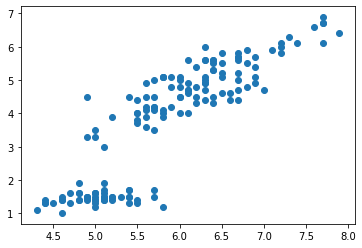

In [9]:
# 散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示

import matplotlib.pyplot as plt
df_sp=df["sepal length (cm)"]
df_pl=df["petal length (cm)"]
plt.scatter(df["sepal length (cm)"],df["petal length (cm)"])
plt.show()

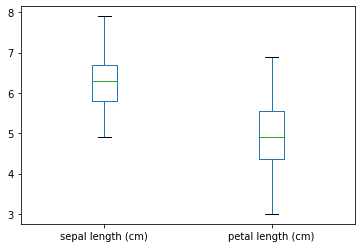

In [23]:
df2.plot.box()
plt.show()

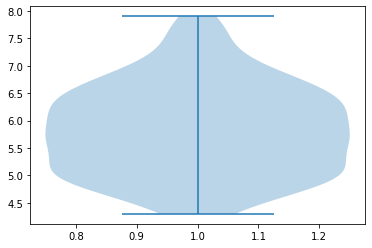

In [28]:
plt.violinplot(df_sp)
plt.show()

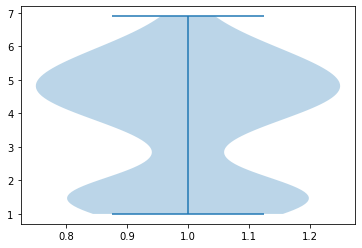

In [29]:
plt.violinplot(df_pl)
plt.show()

【問題3】前処理・訓練データと検証データの分割

In [68]:
df3=df[["sepal length (cm)","petal length (cm)","Species"]]

import numpy as np
df3_np=np.array(df2)

from sklearn.model_selection import train_test_split
df3_np_sp=train_test_split(df3_np)


df3_kunren=df3_np_sp[0]
df3_kensyo=df3_np_sp[1]

df3_kunren_xx=df3_kunren[:,0:2]
df3_kensyo_xx=df3_kensyo[:,0:2]

df3_kunren_yy=df3_kunren[:,2]
df3_kensyo_yy=df3_kensyo[:,2]


df3_np

array([[7. , 4.7, 1. ],
       [6.4, 4.5, 1. ],
       [6.9, 4.9, 1. ],
       [5.5, 4. , 1. ],
       [6.5, 4.6, 1. ],
       [5.7, 4.5, 1. ],
       [6.3, 4.7, 1. ],
       [4.9, 3.3, 1. ],
       [6.6, 4.6, 1. ],
       [5.2, 3.9, 1. ],
       [5. , 3.5, 1. ],
       [5.9, 4.2, 1. ],
       [6. , 4. , 1. ],
       [6.1, 4.7, 1. ],
       [5.6, 3.6, 1. ],
       [6.7, 4.4, 1. ],
       [5.6, 4.5, 1. ],
       [5.8, 4.1, 1. ],
       [6.2, 4.5, 1. ],
       [5.6, 3.9, 1. ],
       [5.9, 4.8, 1. ],
       [6.1, 4. , 1. ],
       [6.3, 4.9, 1. ],
       [6.1, 4.7, 1. ],
       [6.4, 4.3, 1. ],
       [6.6, 4.4, 1. ],
       [6.8, 4.8, 1. ],
       [6.7, 5. , 1. ],
       [6. , 4.5, 1. ],
       [5.7, 3.5, 1. ],
       [5.5, 3.8, 1. ],
       [5.5, 3.7, 1. ],
       [5.8, 3.9, 1. ],
       [6. , 5.1, 1. ],
       [5.4, 4.5, 1. ],
       [6. , 4.5, 1. ],
       [6.7, 4.7, 1. ],
       [6.3, 4.4, 1. ],
       [5.6, 4.1, 1. ],
       [5.5, 4. , 1. ],
       [5.5, 4.4, 1. ],
       [6.1, 4.6

【問題4】前処理・標準化

In [11]:
# 訓練用データの標準化 特徴量
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3_kunren)
scaler.transform(df3_kunren)
df3_std_kunren = pd.DataFrame(scaler.transform(df3_kunren), columns=["sepal length (cm)","petal length (cm)","Species"])

df3_std_kunren_x=df3_std_kunren.loc[:,["sepal length (cm)","petal length (cm)"]]
df3_std_kunren_xnp=np.array(df3_std_kunren_x)

df3_std_kunren_y=df3_std_kunren.loc[:,["Species"]]
df3_std_kunren_ynp=np.array(df3_std_kunren_y)

In [12]:
# 検証用データの標準化 特徴量

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3_kensyo)
scaler.transform(df3_kensyo)
df3_std_kensyo = pd.DataFrame(scaler.transform(df3_kensyo), columns=["sepal length (cm)","petal length (cm)","Species"])

df3_std_kensyo_x=df3_std_kensyo.loc[:,["sepal length (cm)","petal length (cm)"]]
df3_std_kensyo_xnp=np.array(df3_std_kensyo_x)

df3_std_kensyo_y=df3_std_kensyo.loc[:,["Species"]]
df3_std_kensyo_ynp=np.array(df3_std_kensyo_y)

【問題5】学習と推定

In [19]:
# 最近傍法（k-nearest neighbors, 5-nn）で学習

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(df3_std_kunren_xnp,df3_kunren_yy)

neigh.predict(df3_std_kensyo_xnp)

array([2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 2., 2.])

In [20]:
# 最近傍法（k-nearest neighbors, 3-nn）で学習

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df3_std_kunren_xnp,df3_kunren_yy)

neigh.predict(df3_std_kensyo_xnp)

array([2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 2., 2.])

In [21]:
# 最近傍法（k-nearest neighbors, 1-nn）で学習

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(df3_std_kunren_xnp,df3_kunren_yy)

neigh.predict(df3_std_kensyo_xnp)

array([1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 2., 2.])

【問題6】評価

In [14]:
# scikit-learnを使い4種類の指標を計算する
# Accuracy（正解率）
y_pred=neigh.predict(df3_std_kensyo_xnp)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred))
print(accuracy_score(df3_kensyo_yy, y_pred,normalize=False))

0.88
22


In [28]:
# scikit-learnを使い4種類の指標を計算する
# Precision（適合率）

from sklearn.metrics import precision_score
precision_score(df3_kensyo_yy, y_pred)

0.9230769230769231

In [29]:
# scikit-learnを使い4種類の指標を計算する
# Recall（再現率）

from sklearn.metrics import recall_score
recall_score(df3_kensyo_yy, y_pred)

0.8571428571428571

In [30]:
# scikit-learnを使い4種類の指標を計算する
# F値

from sklearn.metrics import f1_score
f1_score(df3_kensyo_yy, y_pred)

0.888888888888889

In [18]:
# 混同行列をscikit-learnを使い表示する
from sklearn.metrics import confusion_matrix
confusion_matrix(df3_kensyo_yy, y_pred)

array([[12,  2],
       [ 1, 10]])

4種類の指標値の意味について簡単に調査して文章でまとめる

ccuracy（正解率）・・・すべてのサンプルのうち正解したサンプルの割合

Precision（適合率）・・・適合率（precision）は、陽性と予測されたサンプルのうち正解したサンプルの割合

Recall（再現率）・・・実際に陽性のサンプルのうち正解したサンプルの割合

F値・・・適合率と再現率の調和平均

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

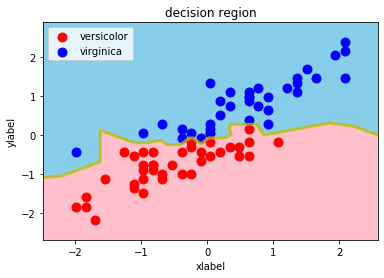

In [23]:
decision_region(df3_std_kunren_xnp,df3_kunren_yy,neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

【問題8】他の手法の学習

＜ロジスティック回帰＞

In [26]:
#　学習
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(df3_std_kunren_xnp,df3_kunren_yy)

# 推定
clf.predict(df3_std_kensyo_xnp)

array([2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 2., 2., 1., 2., 2., 2., 2.])

In [15]:
#　評価
y_pred_clf=clf.predict(df3_std_kensyo_xnp)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clf))
print(accuracy_score(df3_kensyo_yy, y_pred_clf,normalize=False))

0.96
24


In [16]:
# Precision（適合率）
from sklearn.metrics import precision_score
precision_score(df3_kensyo_yy, y_pred_clf)

1.0

In [17]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(df3_kensyo_yy, y_pred_clf)

0.9090909090909091

In [18]:
# F値
from sklearn.metrics import f1_score
f1_score(df3_kensyo_yy, y_pred_clf)

0.9523809523809523

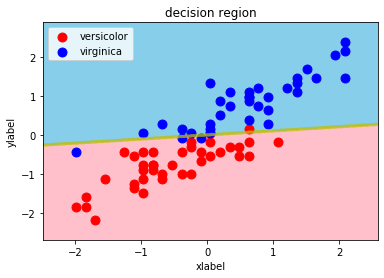

In [24]:
#可視化

decision_region(df3_std_kunren_xnp,df3_kunren_yy,clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

＜SVM＞

In [28]:
#　学習
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clfsvm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clfsvm.fit(df3_std_kunren_xnp,df3_kunren_yy)

# 推定
clfsvm.predict(df3_std_kensyo_xnp)

array([2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 2., 2., 1., 2., 2., 2., 2.])

In [29]:
#　評価
y_pred_clfsvm=clfsvm.predict(df3_std_kensyo_xnp)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clfsvm))
print(accuracy_score(df3_kensyo_yy, y_pred_clfsvm,normalize=False))

0.96
24


In [30]:
# Precision（適合率）
from sklearn.metrics import precision_score
precision_score(df3_kensyo_yy, y_pred_clfsvm)

1.0

In [31]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(df3_kensyo_yy, y_pred_clfsvm)

0.9090909090909091

In [32]:
# F値
from sklearn.metrics import f1_score
f1_score(df3_kensyo_yy, y_pred_clfsvm)

0.9523809523809523

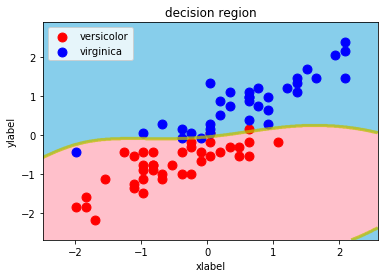

In [33]:
#可視化

decision_region(df3_std_kunren_xnp,df3_kunren_yy,clfsvm, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

＜決定木＞

In [34]:
#　学習
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clftree = DecisionTreeClassifier(random_state=0)
clftree.fit(df3_std_kunren_xnp,df3_kunren_yy)

# 推定
clftree.predict(df3_std_kensyo_xnp)

array([2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 2., 2.])

In [35]:
#　評価
y_pred_clftree=clftree.predict(df3_std_kensyo_xnp)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clftree))
print(accuracy_score(df3_kensyo_yy, y_pred_clftree,normalize=False))

0.92
23


In [36]:
# Precision（適合率）
from sklearn.metrics import precision_score
precision_score(df3_kensyo_yy, y_pred_clftree)

0.9090909090909091

In [37]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(df3_kensyo_yy, y_pred_clftree)

0.9090909090909091

In [38]:
# F値
from sklearn.metrics import f1_score
f1_score(df3_kensyo_yy, y_pred_clftree)

0.9090909090909091

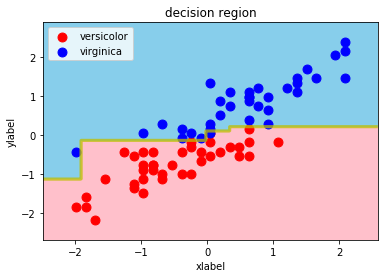

In [39]:
#可視化

decision_region(df3_std_kunren_xnp,df3_kunren_yy,clftree, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

＜ランダムフォレスト＞

In [41]:
#　学習
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clfrandom = RandomForestClassifier(max_depth=2, random_state=0)
clfrandom.fit(df3_std_kunren_xnp,df3_kunren_yy)

# 推定
clfrandom.predict(df3_std_kensyo_xnp)

array([2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       1., 2., 2., 1., 2., 2., 2., 2.])

In [42]:
#　評価
y_pred_clfrandom=clfrandom.predict(df3_std_kensyo_xnp)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clfrandom))
print(accuracy_score(df3_kensyo_yy, y_pred_clfrandom,normalize=False))

0.96
24


In [43]:
# Precision（適合率）
from sklearn.metrics import precision_score
precision_score(df3_kensyo_yy, y_pred_clfrandom)

1.0

In [44]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(df3_kensyo_yy, y_pred_clfrandom)

0.9090909090909091

In [45]:
# F値
from sklearn.metrics import f1_score
f1_score(df3_kensyo_yy, y_pred_clfrandom)

0.9523809523809523

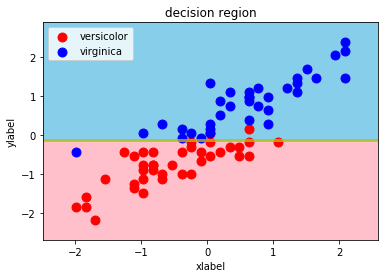

In [46]:
#可視化

decision_region(df3_std_kunren_xnp,df3_kunren_yy,clfrandom, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

In [48]:
#　指標値を１つの表にまとめる

shihyo=[[0.88,0.92,0.85,0.88],[0.96,1,0.9,0.95],[0.96,1,0.9,0.95],[0.92,0.9,0.9,0.9],[0.96,1,0.9,0.95]]

In [94]:
import pandas as pd

df1=pd.DataFrame(shihyo,columns=["Accuracy（正解率）","Precision（適合率）","Recall（再現率）","F値"],index=['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'])

df1

,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
最近傍法,0.88,0.92,0.85,0.88
ロジスティック回帰,0.96,1.00,0.90,0.95
SVM,0.96,1.00,0.90,0.95
決定木,0.92,0.90,0.90,0.90
ランダムフォレスト,0.96,1.00,0.90,0.95


表と決定領域を利用して結果を簡単に考察

決定領域に関して、学習方法によって特出するような大きな違いはそれほど観測はされなかった。
指標値に関しても大きな違いはあまり見られないが、ロジスティック回帰、SVM、ランダムフォレストに関しては高い数値を示していた。

【問題9】（アドバンス課題）標準化の有無の比較

＜最近傍法＞

In [72]:
# 最近傍法（k-nearest neighbors, 5-nn）で学習
# 標準化しない場合の学習

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(df3_kunren_xx,df3_kunren_yy)

neigh.predict(df3_kensyo_xx)

array([1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1.])

In [73]:
# Accuracy（正解率）
y_pred_kin=neigh.predict(df3_kensyo_xx)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_kin))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3_kensyo_yy, y_pred_kin))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3_kensyo_yy, y_pred_kin))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3_kensyo_yy, y_pred_kin))

0.92
0.8823529411764706
1.0
0.9375


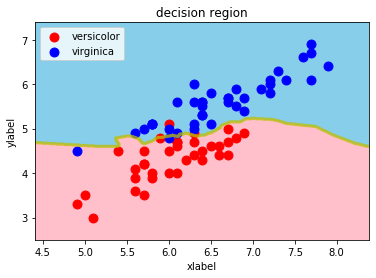

In [74]:
decision_region(df3_kunren_xx,df3_kunren_yy,neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

標準化ありとなしを比較して、指標に関しては悪くなったものもあれば、よくなったものがあり、評価をするのは難しい結果となった、決定領域についても同じような結果であった。

＜ロジスティック回帰＞

In [77]:
#　学習
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(df3_kunren_xx,df3_kunren_yy)

# 推定
clf.predict(df3_kensyo_xx)

array([1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1.,
       2., 2., 1., 1., 2., 1., 2., 1.])

In [81]:
y_pred_clf=clf.predict(df3_kensyo_xx)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clf))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3_kensyo_yy, y_pred_clf))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3_kensyo_yy, y_pred_clf))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3_kensyo_yy, y_pred_clf))

0.84
0.8666666666666667
0.8666666666666667
0.8666666666666667


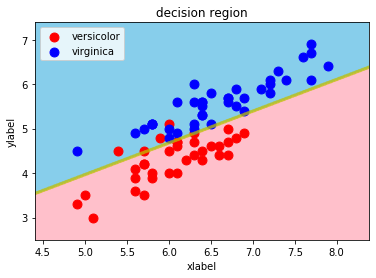

In [82]:
decision_region(df3_kunren_xx,df3_kunren_yy,clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

＜SVM＞

In [83]:
clfsvm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clfsvm.fit(df3_kunren_xx,df3_kunren_yy)

# 推定
clfsvm.predict(df3_kensyo_xx)

array([1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1.])

In [84]:
y_pred_clfsvm=clfsvm.predict(df3_kensyo_xx)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clfsvm))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3_kensyo_yy, y_pred_clfsvm))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3_kensyo_yy, y_pred_clfsvm))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3_kensyo_yy, y_pred_clfsvm))

0.88
0.8333333333333334
1.0
0.9090909090909091


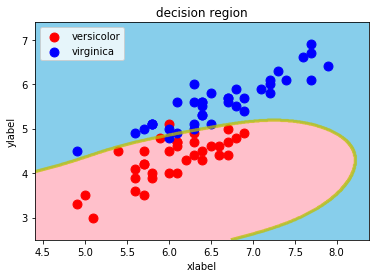

In [85]:
decision_region(df3_kunren_xx,df3_kunren_yy,clfsvm, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

＜決定木＞

In [87]:
clftree = DecisionTreeClassifier(random_state=0)
clftree.fit(df3_kunren_xx,df3_kunren_yy)

# 推定
clftree.predict(df3_kensyo_xx)

array([1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 2., 1., 2., 1.])

In [88]:
y_pred_clftree=clftree.predict(df3_kensyo_xx)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clftree))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3_kensyo_yy, y_pred_clftree))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3_kensyo_yy, y_pred_clftree))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3_kensyo_yy, y_pred_clftree))

0.88
0.8333333333333334
1.0
0.9090909090909091


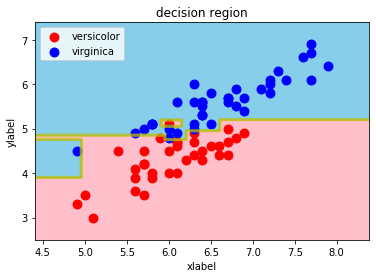

In [89]:
decision_region(df3_kunren_xx,df3_kunren_yy,clftree, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

＜ランダムフォレスト＞

In [90]:
clfrandom = RandomForestClassifier(max_depth=2, random_state=0)
clfrandom.fit(df3_kunren_xx,df3_kunren_yy)

# 推定
clfrandom.predict(df3_kensyo_xx)

array([1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1.])

In [91]:
y_pred_clfrandom=clfrandom.predict(df3_kensyo_xx)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print(accuracy_score(df3_kensyo_yy, y_pred_clfrandom))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3_kensyo_yy, y_pred_clfrandom))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3_kensyo_yy, y_pred_clfrandom))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3_kensyo_yy, y_pred_clfrandom))

0.92
0.8823529411764706
1.0
0.9375


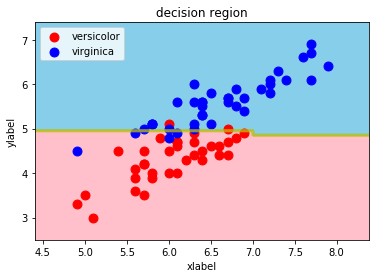

In [92]:
decision_region(df3_kunren_xx,df3_kunren_yy,clfrandom, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

In [97]:
#　指標値作成

shihyo1=[[0.92,0.88,1.,0.93],[0.84,0.86,0.86,0.86],[0.88,0.83,1,0.9],[0.88,0.83,1,0.9],[0.92,0.88,1,0.93]]


df2=pd.DataFrame(shihyo1,columns=["Accuracy（正解率）非","Precision（適合率）非","Recall（再現率）非","F値非"],index=['最近傍法', 'ロジスティック回帰', 'SVM', '決定木', 'ランダムフォレスト'])

In [101]:
df1

,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
最近傍法,0.88,0.92,0.85,0.88
ロジスティック回帰,0.96,1.00,0.90,0.95
SVM,0.96,1.00,0.90,0.95
決定木,0.92,0.90,0.90,0.90
ランダムフォレスト,0.96,1.00,0.90,0.95


In [102]:
df2

,Accuracy（正解率）非,Precision（適合率）非,Recall（再現率）非,F値非
最近傍法,0.92,0.88,1.00,0.93
ロジスティック回帰,0.84,0.86,0.86,0.86
SVM,0.88,0.83,1.00,0.90
決定木,0.88,0.83,1.00,0.90
ランダムフォレスト,0.92,0.88,1.00,0.93


＜考察＞

指標のまとめを見ると、標準化をしなかった結果、悪くなった指標もあれば、よくなった指標もあり一概に評価をするのが難しいが、正解率、適合率はどの手法でも標準化をしないと数値の評価は悪くなっている。
しかし、再現率は標準化をしない方が高い傾向にあるような傾向も見られる（ロジスティック回帰を除く）

決定領域に関しては、グラフを見ると領域に変化が見られたのが、ロジスティック回帰とSVMであった。
残りの手法では特出するような大きな変化は少なかった。

前処理をすることで、基本的にどの手法でも指標の数値がよくなり、より良い機械学習を行うことができることがわかる。

標準化をしないと、手法によって大きく結果に違いが見られるものもあり、安定した分析ができない可能性がある。

【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法

In [107]:
# データフレームから抜き出しをして整理

df3chi=df[["sepal length (cm)","petal length (cm)","Species"]]

In [108]:
# データ分割

import numpy as np
df3chi_np=np.array(df3chi)

from sklearn.model_selection import train_test_split
df3chi_np_sp=train_test_split(df3chi_np)


df3chi_kunren=df3chi_np_sp[0]
df3chi_kensyo=df3chi_np_sp[1]

df3chi_kunren_xx=df3chi_kunren[:,0:2]
df3chi_kensyo_xx=df3chi_kensyo[:,0:2]

df3chi_kunren_yy=df3chi_kunren[:,2]
df3chi_kensyo_yy=df3chi_kensyo[:,2]

In [111]:
# 訓練用データの標準化 特徴量
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3chi_kunren)
scaler.transform(df3chi_kunren)
df3chi_std_kunren = pd.DataFrame(scaler.transform(df3chi_kunren), columns=["sepal length (cm)","petal length (cm)","Species"])

df3chi_std_kunren_x=df3chi_std_kunren.loc[:,["sepal length (cm)","petal length (cm)"]]
df3chi_std_kunren_xnp=np.array(df3chi_std_kunren_x)

df3chi_std_kunren_y=df3chi_std_kunren.loc[:,["Species"]]
df3chi_std_kunren_ynp=np.array(df3chi_std_kunren_y)

In [109]:
# データ標準化

# 検証用データの標準化 特徴量

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3chi_kensyo)
scaler.transform(df3chi_kensyo)
df3chi_std_kensyo = pd.DataFrame(scaler.transform(df3chi_kensyo), columns=["sepal length (cm)","petal length (cm)","Species"])

df3chi_std_kensyo_x=df3chi_std_kensyo.loc[:,["sepal length (cm)","petal length (cm)"]]
df3chi_std_kensyo_xnp=np.array(df3chi_std_kensyo_x)

df3chi_std_kensyo_y=df3chi_std_kensyo.loc[:,["Species"]]
df3chi_std_kensyo_ynp=np.array(df3chi_std_kensyo_y)

＜最近傍法　３値＞

In [116]:
# 最近傍法（k-nearest neighbors, 5-nn）で学習

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(df3chi_std_kunren_xnp,df3chi_kunren_yy)

neigh.predict(df3chi_std_kensyo_xnp)

array([2., 1., 1., 1., 2., 1., 2., 0., 1., 2., 0., 2., 0., 2., 2., 1., 0.,
       1., 2., 1., 0., 2., 2., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 0.,
       2., 1., 0., 1.])

In [138]:
# Accuracy（正解率）
y_pred_kin=neigh.predict(df3chi_std_kensyo_xnp)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3chi_kensyo_yy, y_pred_kin))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473


In [133]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue','green']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

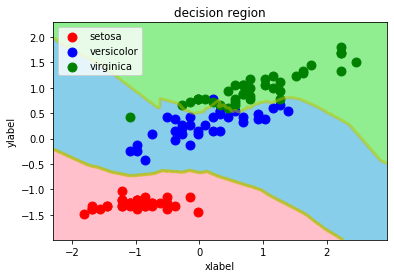

In [134]:
decision_region(df3chi_std_kunren_xnp,df3chi_kunren_yy,neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

＜ロジスティック回帰　３値＞

In [135]:
#　学習
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(df3chi_std_kunren_xnp,df3chi_kunren_yy)

# 推定
clf.predict(df3chi_std_kensyo_xnp)

array([2., 1., 2., 1., 2., 1., 2., 0., 2., 2., 0., 2., 0., 2., 2., 1., 0.,
       2., 2., 1., 0., 2., 2., 0., 0., 0., 0., 0., 2., 1., 2., 1., 1., 0.,
       2., 2., 0., 1.])

In [140]:
# Accuracy（正解率）
y_pred_kin=clf.predict(df3chi_std_kensyo_xnp)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3chi_kensyo_yy, y_pred_kin))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

0.8421052631578947
0.8421052631578947
0.8421052631578947
0.8421052631578947


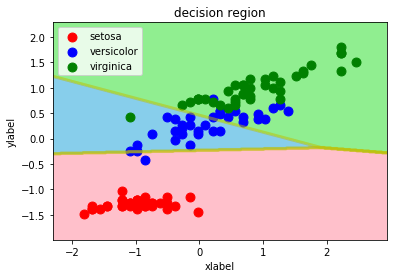

In [137]:
decision_region(df3chi_std_kunren_xnp,df3chi_kunren_yy,clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

＜SVM＞

In [139]:
clfsvm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clfsvm.fit(df3chi_std_kunren_xnp,df3chi_kunren_yy)

# 推定
clfsvm.predict(df3chi_std_kensyo_xnp)

array([2., 1., 1., 1., 1., 1., 2., 0., 1., 2., 0., 2., 0., 2., 2., 1., 0.,
       1., 2., 1., 0., 2., 2., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 0.,
       2., 1., 0., 1.])

In [141]:
# Accuracy（正解率）
y_pred_kin=clfsvm.predict(df3chi_std_kensyo_xnp)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3chi_kensyo_yy, y_pred_kin))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315


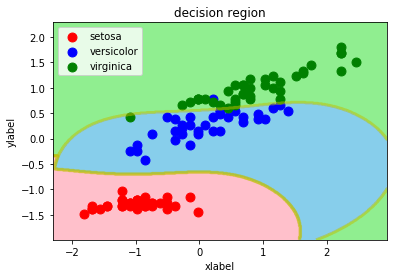

In [142]:
decision_region(df3chi_std_kunren_xnp,df3chi_kunren_yy,clfsvm, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

＜決定木＞

In [143]:
clftree = DecisionTreeClassifier(random_state=0)
clftree.fit(df3chi_std_kunren_xnp,df3chi_kunren_yy)

# 推定
clftree.predict(df3chi_std_kensyo_xnp)

array([2., 1., 1., 1., 1., 1., 2., 0., 1., 2., 0., 2., 0., 2., 2., 1., 0.,
       1., 1., 1., 0., 2., 2., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 0.,
       2., 1., 0., 1.])

In [156]:
# Accuracy（正解率）
y_pred_kin=clftree.predict(df3chi_std_kensyo_xnp)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3chi_kensyo_yy, y_pred_kin))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473


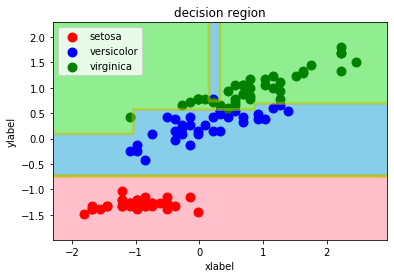

In [157]:
decision_region(df3chi_std_kunren_xnp,df3chi_kunren_yy,clftree, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

＜ランダムフォレスト＞

In [158]:
clfrandom = RandomForestClassifier(max_depth=2, random_state=0)
clfrandom.fit(df3chi_std_kunren_xnp,df3chi_kunren_yy)

# 推定
clfrandom.predict(df3chi_std_kensyo_xnp)

array([2., 1., 1., 1., 1., 1., 2., 0., 1., 1., 0., 2., 0., 2., 2., 1., 0.,
       1., 2., 1., 0., 2., 2., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 0.,
       2., 2., 0., 1.])

In [159]:
# Accuracy（正解率）
y_pred_kin=clfrandom.predict(df3chi_std_kensyo_xnp)
from sklearn.metrics import accuracy_score
print(accuracy_score(df3chi_kensyo_yy, y_pred_kin))

# Precision（適合率）
from sklearn.metrics import precision_score
print(precision_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# Recall（再現率）
from sklearn.metrics import recall_score
print(recall_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

# F値
from sklearn.metrics import f1_score
print(f1_score(df3chi_kensyo_yy, y_pred_kin,average='micro'))

0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315


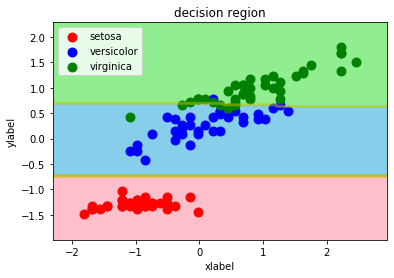

In [160]:
decision_region(df3chi_std_kunren_xnp,df3chi_kunren_yy,clfrandom, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

＜考察＞

５パターンで３値で行ったところ、ロジスティック回帰では他の４つと比べ少し悪い数値となった。
もっとも良い手法は＜ランダムフォレスト＞＜SVM＞となった。
ただ近傍法もまずまずの数値であった。